# CSE473s — Computational Intelligence  
## Project Demo Notebook for Team 23
### our custom deep-learning library correctly learns the XOR function using a 2–2–1 multilayer perceptron (MLP) with Tanh activation, MSE loss, and SGD optimizer.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))

from lib3.layers import Layer_Dense
from lib3.activations import Activation_Tanh
from lib3.losses import Loss_MSE
from lib3.optimizer import SGD


#### XOR Dataset

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=float)
y = np.array([[0], [1], [1], [0]], dtype=float)

 #### Create layers, activation functions, Loss &  Optimizer


In [3]:
layer1 = Layer_Dense(2, 2)  # Hidden layer: 2 neurons
activation1 = Activation_Tanh()

layer2 = Layer_Dense(2, 1) # Output layer: 1 neuron
activation2 = Activation_Tanh()

#loss & optimizer
loss_function = Loss_MSE()
optimizer = SGD(learning_rate=0.1)
loss_history = []

#### Traning Loop

In [4]:
epochs = 5000

for epoch in range(epochs):
    
    # Forward pass
    layer1.forward(X)
    activation1.forward(layer1.output)
    
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    # Compute loss
    loss = loss_function.forward(activation2.output, y)
    loss_history.append(loss)
    
    # Backward pass
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    layer2.backward(activation2.dinputs)
    
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    optimizer.update_params([layer1, layer2])
    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
        
print("Training complete.")

Epoch 0, Loss: 0.49922017779851546
Epoch 500, Loss: 0.2500228718420884
Epoch 1000, Loss: 0.2500027186806211
Epoch 1500, Loss: 0.2499942042389428
Epoch 2000, Loss: 0.2499836850473863
Epoch 2500, Loss: 0.24995632329676967
Epoch 3000, Loss: 0.24980443230661675
Epoch 3500, Loss: 0.242558034276886
Epoch 4000, Loss: 0.13135438909327304
Epoch 4500, Loss: 0.00404091070562762
Training complete.


#### Loss Curve Plot

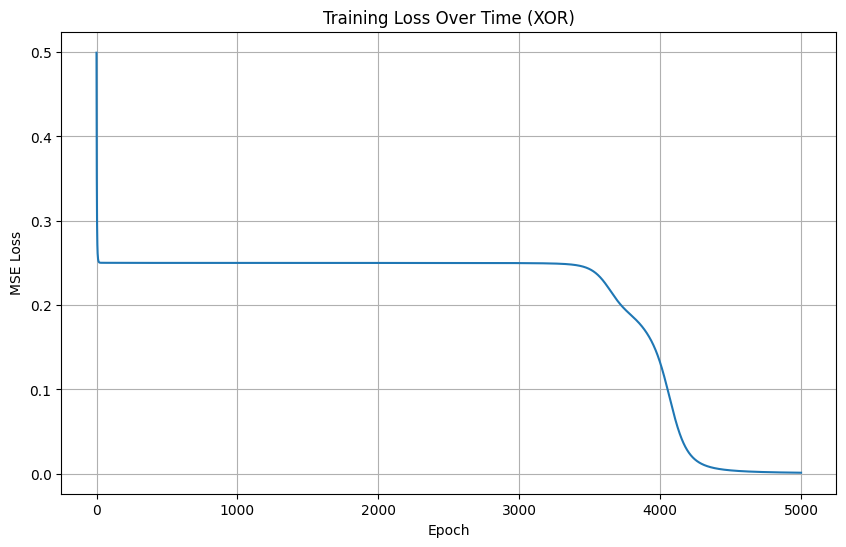

In [7]:
plt.figure(figsize=(10,6))
plt.plot(loss_history)
plt.title("Training Loss Over Time (XOR)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()
